# Investment Analysis Assignment

##### Note : Markdown texts in <span style = "color : green">green</span> are observations of analysis.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading to files - rounds2.csv and companies.csv
rounds_df = pd.read_csv("raw_data/rounds2.csv", encoding = "ISO-8859-1")
companies_df = pd.read_csv("raw_data/companies.csv", encoding = "ISO-8859-1" )

#### Checking Imported Dataset

In [3]:
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [4]:
# checking top 10 rows of rounds dataframe
rounds_df.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000.0


In [5]:
# checking bottom 10 rows of rounds dataframe
rounds_df.tail(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114939,/ORGANIZATION/ZZISH,/funding-round/4c82e18a8e3eab2647719d0fc27ead5f,angel,NaN,31-10-2014,400000.0
114940,/organization/zzish,/funding-round/73721fffc980d228f051e87422aa8732,seed,NaN,24-03-2014,320000.0
114941,/ORGANIZATION/ZZNODE-SCIENCE-AND-TECHNOLOGY-CO...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1587301.0
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,7000.0
114943,/ORGANIZATION/ZZZZAPP-COM,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,33149.0
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


<span style="color:green">

**Observations :**
    <p>Row number 114939 and 114940 are same companies with different funding_round_type. This means that the same companies can be repeated in rounds table for different funding type.</p>
    <p>Also, for row number 114939, the company_permalink is in upper case and the one below that (row number 114940) is in lower case. So we must either convert all permalink to lower case or  to upper case during data cleaning.</p>
    <p>The last 3 rows (number 114946 to 114949), has special characters. These needs to be fixed before we further analyse our data</p>
    
</span>

In [6]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [7]:
# checking top 10 rows of companies dataframe
companies_df.head(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


<span style="color:green">

**Observations :**
    <p>Row number 0 in companies dataframe and row number 0 in rounds dataframe are for same company. But both are in different cases. So "permalink" column in companies dataframe needs to be in a consistent case (upper or lower case) with rounds dataframe for fair comparison between both. </p>
    
</span>

In [8]:
# checking bottom 10 rows of companies dataframe
companies_df.tail(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66358,/Organization/Zyraz-Technology,Zyraz Technology,http://www.zyraz.com,Biotechnology,closed,MYS,14,MYS - Other,Damansara New Village,01-01-1994
66359,/Organization/Zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
66360,/Organization/Zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
66361,/Organization/Zytoprotec,Zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01-01-2007
66362,/Organization/Zzish,Zzish,http://www.zzish.com,Analytics|Android|Developer APIs|Education|Gam...,operating,GBR,H9,London,London,28-01-2014
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


<span style="color:green">

**Observations :**
    Row number 66365 to 66367 have special characters in "permalink" column. We must clean this data with proper encoding. 
    
</span>

### Data cleaning before further analysing data

We will be cleaning data for all the observations ( the ones in green font under <span style="color:blue">"Checking Imported Dataset"</span> sections ) above.

In [9]:
# converting "company_permalink" of rounds_df to lower case
rounds_df.company_permalink = rounds_df.company_permalink.str.lower()

In [10]:
# verifying if "company_permalink" got converted to lower case in rounds_df
rounds_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [11]:
# converting "permalink" of companies_df to lower case for consistency
companies_df.permalink = companies_df.permalink.str.lower()

In [12]:
# verifying if "permalink" got converted to lower case in companies_df
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [13]:
# As per our observations, there are special characters in some companies permalinks which needs to be cleaned.
# We will try a few of encoding types.
# The below seems to work well based on our trial and errors.

rounds_df['company_permalink'] = rounds_df.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies_df['permalink'] = companies_df.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [14]:
# Verifying if special character exists in "company_permalink" column of rounds dataframe
rounds_df.tail().company_permalink.apply(lambda x : x.split("/")[2])

114944                                zzzzapp-com
114945                                zzzzapp-com
114946                                       eron
114947                                     asys-2
114948    novatiff-reklam-ve-tantm-hizmetleri-tic
Name: company_permalink, dtype: object

In [15]:
# Verifying if special character exists in "permalink" column of companies dataframe
companies_df.tail().permalink.apply(lambda x : x.split("/")[2])

66363       zznode-science-and-technology-co-ltd
66364                                zzzzapp-com
66365                                       eron
66366                                     asys-2
66367    novatiff-reklam-ve-tantm-hizmetleri-tic
Name: permalink, dtype: object

### Understanding the Dataset - Checkpoint 1

Note. : <span style="color:blue">"company_permalink"</span> column in rounds dataframe and <span style="color:blue">"permalink"</span> column in companies dataframe have the unique id of companies

In [16]:
# Checking number of unique companies present in rounds dataframe
len(rounds_df.company_permalink.str.lower().unique())

66368

In [17]:
# Checking number of unique companies present in the companies dataframe
len(companies_df.permalink.str.lower().unique())

66368

In [18]:
# Identifying which column can be used as unique key in  companies dataframe
companies_df.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/life-in-hi-fi,#NAME?,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


<span style="color:green">
    
**Observations :**
    <p>"permalink" column has 66368 values out of which all values are also unique. </p>
    <p>Hence, we can use "permalink" column in companies dataframe as unique key</p>
</span>

In [19]:
# Checking if there are companies in rounds dataframe which are not present in companies dataframe
rounds_df.loc[~rounds_df['company_permalink'].isin(companies_df['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [20]:
rounds_df.loc[~rounds_df['company_permalink'].isin(companies_df['permalink']), :].count()

company_permalink          0
funding_round_permalink    0
funding_round_type         0
funding_round_code         0
funded_at                  0
raised_amount_usd          0
dtype: int64

<span style="color:green">
    
**Observations :**
    <p>Based on the above analysis, we can determine that all companies in rounds dataframe are present in companies dataframe. </p>
</span>

In [21]:
# Renaming the company_permalink column of rounds_df to permalink before the merge
rounds_df.rename(columns={'company_permalink':'permalink'}, inplace=True)

In [22]:
# Checking if the "company_permalink" has been renamed to "permalink" in rounds_df
rounds_df.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [23]:
# Merging the two dataframes so that all variables(columns) in the companies frame are added to the rounds dataframe
master_frame = pd.merge(rounds_df, companies_df, how="left", on = "permalink")

In [24]:
# Analysing dataset after merge
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [25]:
master_frame.columns

Index(['permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at'],
      dtype='object')

In [26]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [27]:
# Checking number of observations in master_frame
master_frame.shape

(114949, 15)

In [28]:
# Checking unique companies in master_frame
len(master_frame.permalink.unique())

66368

<span style="color:green">

**Observations :**
    <p>Number of unique companies has not changed. It remains 66368 which is same as the number of unique companies in rounds_df and companies_df. </p>
    </span>

### Data Cleaning Post Merge - Treating Missing Values and Dropping Unnecessary Columns

In [29]:
#Summing up the missing values at columns level
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [30]:
#Representing the sum of Missing values at column level in percentage - For better understanding
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

<span style="color:green">

**Observations :**
    <p>The column <span style="color:blue">"funding_round_code"</span> has 72.91% of missing values and does not have any business value. So we can drop that.</p>
    <p>Also the following columns are not needed as per our business objectives :</p>
    <span style="color:blue">
        <li>
            homepage_url
        </li>
        <li>
            state_code
        </li>
        <li>
            region
        </li>
        <li>
            city
        </li>
        <li>
            founded_at
        </li>
    </span>
    </span>

In [31]:
#Dropping columns as per above observations:
master_frame = master_frame.drop(['funding_round_code', 'homepage_url', 'state_code', 'region', 'city', 'founded_at'], axis = 1)
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN


In [32]:
#Representing the sum of Missing values at column level in percentage - For better understanding
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
dtype: float64

<span style="color:green">

**Observations :**
    <p>As per our business objectives, <span style="color:blue">'raised_amount_usd'</span>, <span style="color:blue">'country_code'</span> and <span style="color:blue">'category_list'</span> columns are important.</p>
    <p>We will now see how we can deal with the missing values in  <span style="color:blue">'raised_amount_usd'</span> column</p>
    </span>

In [33]:
master_frame.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [34]:
print("Mean is : ",round(master_frame.raised_amount_usd.mean()), 
      "\nMedian is :",  round(master_frame.raised_amount_usd.median()))

Mean is :  10426869 
Median is : 1680511


<span style = "color : green">
    
**Observations:**
    <p>The Mean is around 10 million and Median is around 1 million which means that the data distribution is positively skewed. The range (max - min) is also huge which means that the spread of data is large.</p>
 <p>Since this is an important column and we have quite a large number of observations, we can drop the rows with missing 'raised_amount_usd' columns instead of imputing with median(in this case, since data distribution is skewed)</p>
</span>

In [35]:
#Checking rows with missing values in raised_amount_usd column
master_frame[master_frame.raised_amount_usd.isnull()]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,004 Technologies,Software,operating,USA
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,05-02-2013,NaN,One Inc.,Mobile,operating,USA
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,21-04-2013,NaN,1-4 All,Entertainment|Games|Software,operating,USA
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,22-01-2014,NaN,1.618 Technology,Networking|Real Estate|Web Hosting,operating,USA
19,/organization/1-800-dentist,/funding-round/5274aacc211163fc7c86539ce94bbacc,undisclosed,19-08-2010,NaN,1-800-DENTIST,Health and Wellness,operating,USA
33,/organization/1000lookz,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,22-07-2013,NaN,1000Lookz,Beauty,operating,IND
40,/organization/1000museums-com,/funding-round/6dcccfea326e6add866bf67aafb0a7df,convertible_note,01-12-2014,NaN,1000museums.com,Curated Web,operating,USA
42,/organization/1000museums-com,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,01-02-2014,NaN,1000museums.com,Curated Web,operating,USA
51,/organization/1006-tv,/funding-round/a3631227d5232aa8c2303f252c4f1f87,angel,01-01-2011,NaN,1006.tv,Games|Media,operating,CHN


In [36]:
# Removing rows with missing values in "raised_amount_usd" column
master_frame = master_frame[~master_frame.raised_amount_usd.isnull()]

In [37]:
#Validating if rows with missing values in "raised_amount_usd" column has been removed
master_frame[master_frame.raised_amount_usd.isnull()]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code


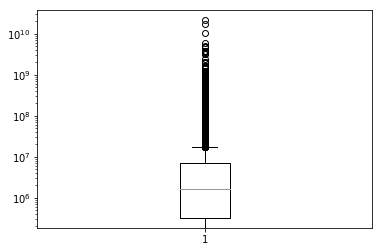

In [38]:
# Checking Data Distribution 
plt.boxplot(master_frame.raised_amount_usd)
plt.yscale("log")
plt.show()

In [39]:
#Representing the sum of Missing values at column level in percentage - For better understanding
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
dtype: float64

<span style = "color : green">
    
**Observations:**
    <p><span style = "color : blue">'category_list'</span> and <span style = "color : blue">'country_code'</span> columns have very few missing values, so we will remove those rows.</p>
</span>

In [40]:
master_frame = master_frame[~master_frame.country_code.isnull()]

In [41]:
master_frame = master_frame[~master_frame.category_list.isnull()]

In [42]:
#Representing the sum of Missing values at column level in percentage - For better understanding
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                  0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

In [43]:
master_frame.shape

(88529, 9)

<span style = "color : green">
    
**Observations:**
    <p>The dataframe has no missing values and has 88529 rows and 9 columns for our analysis</p>
</span>

### Representative Values of Investments for Each of these Funding Types - Checkpoint 2

<span style = "color : black">
    <p>As per our business requirement, we are only interested in seed, angel, private equity and venture types investments. Hence we will now filter only those funding round types out of the rows in master_frame</p>
</span>


In [44]:
# identifying all funding types in the dataframe
master_frame.funding_round_type.value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [45]:
#filtering out the ones we need for our business use case
master_frame = master_frame[(master_frame.funding_round_type == 'seed') 
             | (master_frame.funding_round_type == 'angel')
             | (master_frame.funding_round_type == 'private_equity')
             | (master_frame.funding_round_type == 'venture')
            ]

In [46]:
#checking number of observations for our analysis
master_frame.shape

(75124, 9)

In [47]:
#Verifying if the dataset has been filtered for funding type
master_frame.funding_round_type.value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [48]:
# Checking mean and median (the two centrality measures) for all the filtered funding types
pd.pivot_table(master_frame, values=['raised_amount_usd'], index=['funding_round_type'],
                    aggfunc={np.mean,
                             np.median})

raised_amount_usd            
                                mean      median
funding_round_type                              
angel                   9.715739e+05    414906.0
private_equity          7.393849e+07  20000000.0
seed                    7.477937e+05    300000.0
venture                 1.172422e+07   5000000.0

<span style = "color : green">
    
**Observations:**
    <p>Since there is a huge difference between the mean and median values, we will consider median to be the best representation for the funding types in our master_frame.</p>
</span>

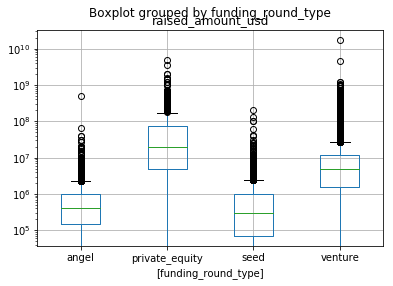

In [49]:
# plot showing the representative amount of investment in each funding type and spread of data
master_frame.boxplot(column=['raised_amount_usd'], by=['funding_round_type'])
plt.yscale("log")
plt.show()

In [50]:
#Sorting median of funding types in ascending order
master_frame.groupby("funding_round_type")['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

<span style = "color : green">
    
**Observations:**
    <p>Sparks Funds wants to invest between 5-15 million USD </p>
    <p>The representative funding amount for private equity is 20 million USD which is more than the range of Sparks Funds </p>
        <p>The representative funding amount for seed and angel is very less as compared to Sparks Funds range specified in business objectives. </p>
            <p>The representative funding amount for venture which is 5 million USD is apt for Spark Funds. Hence, we will go with funding type venture </p>
</span>

### Country Analysis - Analysing the Top 3 English-Speaking Countries : Checkpoint 3	

In [51]:
# filter the dataframe for venture type investments based on our above analysis
master_frame = master_frame[master_frame.funding_round_type == 'venture']

In [52]:
# Validating if the dataframe has been filtered to accommodate only venture type
master_frame.funding_round_type.value_counts()

venture    47809
Name: funding_round_type, dtype: int64

In [53]:
#grouping by country codes to compare the total funding amounts
country_df = master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)

In [54]:
print(country_df)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
NLD    2.903876e+09
CHE    2.801560e+09
SGP    2.793918e+09
ESP    1.827622e+09
BRA    1.785818e+09
IRL    1.669286e+09
RUS    1.570426e+09
AUS    1.319029e+09
DNK    1.228311e+09
FIN    1.043200e+09
BEL    1.030840e+09
NOR    9.536361e+08
KOR    8.919883e+08
MYS    8.830588e+08
HKG    7.812670e+08
TWN    6.239795e+08
AUT    5.833607e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
KWT    1.400000e+07
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

In [55]:
#Spark Funds wants to see the top nine countries which have received the highest total funding 
# - across ALL sectors for the chosen investment type
top9 = country_df[:9]

In [56]:
print(top9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64


##### List of territorial entities where English is an official language:
https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

USA, GBR and IND are top 3 English speaking countries based on the above link and our analysis. 

In [57]:
# Filtering for top 3 english speaking countries
master_frame = master_frame[(master_frame.country_code == 'USA') 
             | (master_frame.country_code == 'GBR') 
             | (master_frame.country_code == 'IND')]

In [58]:
# Verifying if we filtered dataframe with top 3 english speaking countries
master_frame.country_code.value_counts()

USA    35943
GBR     2041
IND      819
Name: country_code, dtype: int64

###  Sector Analysis 1 : Checkpoint 4

In [59]:
# Checking category_list column
master_frame.category_list.value_counts()

Biotechnology                                                                                                                           4633
Software                                                                                                                                3238
Health Care                                                                                                                             1224
Clean Technology                                                                                                                        1040
Enterprise Software                                                                                                                     1012
Hardware + Software                                                                                                                      895
Mobile                                                                                                                                   848
Semiconductor

<span style = "color : green">
    
**Observations:**
    <p>For some companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |).</p>
    <p>As per the business rule, the first string before the vertical bar will be considered the primary sector.</p>
</span>

In [60]:
# Extracting the primary sector of each category list from the category_list column
master_frame["primary_sector"] = master_frame.category_list.apply(lambda x : x.split("|")[0].lower())

In [61]:
# Removing category_list since it is not needed
master_frame = master_frame.drop('category_list', axis =1)

In [62]:
# Verifying the extraction of primary sector 
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,operating,IND,media
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,operating,USA,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,operating,USA,analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,operating,USA,analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,1 Mainstream,acquired,USA,apps


<span style = "color : green">
    
**Observations:**
    <p>The 5th observation in the above table (for permalink = /organization/1-mainstream), the <span style = "color : blue">category_list</span> column value is Apps|Cable|Distribution|Software and the <span style = "color : blue">primary_sector</span> column value is apps. </p>
        <p>Hence, verified that the extraction of primary sector from category list worked.</p>
</span>

In [63]:
# reading mapping.csv
mapping_df = pd.read_csv("raw_data/mapping.csv")

**Analysing and understanding the mapping dataframe**

In [64]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [65]:
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


<span style = "color : green">
    
**Observations:**
    <p>The first row has NaN value in category_list.</p>
    <p>We should check for additional missing values in this dataset.</p>
</span>

In [66]:
mapping_df.tail()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
687,Young Adults,0,0,0,0,0,0,0,1,0


In [67]:
len(mapping_df.category_list.unique())

688

### Data Cleaning - Mapping File

***While analysing and understanding the mapping dataframe, we observed columns with NaN values.***

In [68]:
# checking if there are any more missing values
mapping_df.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [69]:
# Missing value in category_list is useless for us
# Removing missing value row
mapping_df = mapping_df[~mapping_df.category_list.isnull()]

In [70]:
# Verifying if Missing value row has been removed
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [71]:
mapping_df.shape

(687, 10)

In [72]:
# Converting category_list column values to lower case so it will be in consistency with master_frame dataframe.
mapping_df.category_list = mapping_df.category_list.str.lower()

In [73]:
# verifying if category_list column in mapping_df has been changed to lower case
mapping_df.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [74]:
# checking if there are values in primary_sector of master_frame not present in category_list of mapping dataframe
master_frame[~master_frame.primary_sector.isin(mapping_df.category_list)]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,H2O.ai,operating,USA,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,H2O.ai,operating,USA,analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,H2O.ai,operating,USA,analytics
61,/organization/100plus,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,100Plus,acquired,USA,analytics
198,/organization/1world-online,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,1World Online,operating,USA,analytics
199,/organization/1world-online,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.0,1World Online,operating,USA,analytics
200,/organization/1world-online,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.0,1World Online,operating,USA,analytics
256,/organization/24-7-card,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.0,24/7 Card,closed,USA,finance
822,/organization/6th-wave-innovations-corporation,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.0,6th Wave Innovations Corporation,operating,USA,nanotechnology
832,/organization/7-billion-people,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.0,7 Billion People,closed,USA,analytics


<span style = "color : green">
    
**Observations:**
    <p>In primary_sector, there are values like analytics, finance and property management which are not in mapping category list.</p>
</span>

In [75]:
# values in primary_sector of master_frame not present in category_list of mapping dataframe
master_frame[~master_frame.primary_sector.isin(mapping_df.category_list)].primary_sector.value_counts()

analytics                          1334
finance                             561
nanotechnology                      141
financial services                  105
big data analytics                   89
career management                    61
cloud management                     43
event management                     25
finance technology                   23
contact management                   21
it management                        20
identity management                  19
document management                  19
business analytics                   16
digital signage                      10
investment management                10
risk management                      10
energy management                     9
project management                    7
supply chain management               6
navigation                            6
journalism                            5
fleet management                      5
innovation management                 5
cannabis                              5


In [76]:
# checking if there are values in category_list of mapping not present in primary_sector of master dataframe
mapping_df[~mapping_df.category_list.isin(master_frame.primary_sector)]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


<span style = "color : green">
    
**Observations:**
    <p>In category_list, there are words like "alter0tive medicine", "a0lytics" and  "waste ma0gement" which suggests "0" has  replaced "na".</p>
</span>

In [77]:
# replacing '0' with 'na'
mapping_df.category_list = mapping_df.category_list.apply( lambda x : x.replace('0', 'na'))

In [78]:
# Total rows in master_frame whose values in primary_sector is not present in category_list of mapping dataframe
master_frame[~master_frame.primary_sector.isin(mapping_df.category_list)].primary_sector.value_counts().sum()

15

***Since there are only 15 rows in master_frame whose primary_sector is not present in category_list of mapping_df, we can remove them.*** 

In [79]:
# Removing rows in master_frame whose primary_sector is not present in category_list of mapping_df
master_frame = master_frame[master_frame.primary_sector.isin(mapping_df.category_list)]

In [80]:
#Validating if there are any rows in master_frame whose primary_sector is not present in category_list of mapping_df
master_frame[~master_frame.primary_sector.isin(mapping_df.category_list)].primary_sector.value_counts().sum()

0

In [81]:
# checking again values in category_list of mapping not present in primary_sector of master dataframe
mapping_df[~mapping_df.category_list.isin(master_frame.primary_sector)].category_list.value_counts()

music education                1
private social networking      1
mobile shopping                1
new product development        1
micro-enterprises              1
moneymaking                    1
homeless shelter               1
air pollution control          1
biomass power generation       1
social recruiting              1
social bookmarking             1
shopping                       1
civil engineers                1
building owners                1
social travel                  1
shipping                       1
email newsletters              1
q&a                            1
business travelers             1
pervasive computing            1
women                          1
tourism                        1
social news                    1
musicians                      1
stock exchanges                1
natural resources              1
energy storage                 1
licensing                      1
organic                        1
rental housing                 1
          

In [82]:
# reshaping dataframe
mapping_df = pd.melt(mapping_df, id_vars = ['category_list'], value_vars = ['Automotive & Sports',
                                                              'Blanks',
                                                              'Cleantech / Semiconductors',
                                                              'Entertainment',
                                                              'Health',
                                                              'Manufacturing',
                                                              'News, Search and Messaging',
                                                              'Others',
                                                              'Social, Finance, Analytics, Advertising'])


In [83]:
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6183 entries, 0 to 6182
Data columns (total 3 columns):
category_list    6183 non-null object
variable         6183 non-null object
value            6183 non-null int64
dtypes: int64(1), object(2)
memory usage: 145.0+ KB


In [84]:
# dropping rows with value as 0
mapping_df = mapping_df[mapping_df.value == 1]


In [85]:
# checking if number of rows is back to 687
mapping_df.shape

(687, 3)

In [86]:
# dropping values column
mapping_df = mapping_df.drop('value', axis =1)

In [87]:
# renaming the variable column to main_sector
mapping_df = mapping_df.rename(columns = {'variable' : 'main_sector'})

In [88]:
# verifying changes made
mapping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 7 to 6158
Data columns (total 2 columns):
category_list    687 non-null object
main_sector      687 non-null object
dtypes: object(2)
memory usage: 16.1+ KB


In [89]:
#Merging mapping dataframe to master dataframe
master_frame = pd.merge(master_frame, mapping_df, how= 'inner', left_on= 'primary_sector', right_on= 'category_list')

In [90]:
# verifying merge success
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,category_list,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,operating,IND,media,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,operating,GBR,media,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,operating,GBR,media,media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,90min,operating,GBR,media,media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,operating,USA,media,media,Entertainment


In [91]:
# dropping category_list since it is the same as primary_sector
master_frame = master_frame.drop('category_list', axis = 1)

In [92]:
#verifying drop
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 10 columns):
permalink                  38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
name                       38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
primary_sector             38788 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


In [93]:
# checking if dataset has any missing values after merge
master_frame.isnull().sum()

permalink                  0
funding_round_permalink    0
funding_round_type         0
funded_at                  0
raised_amount_usd          0
name                       0
status                     0
country_code               0
primary_sector             0
main_sector                0
dtype: int64

In [94]:
# how many main sectors do we have?
master_frame.main_sector.value_counts().count()

8

### Sector Analysis 2 - Checkpoint 5

In [95]:
# filtering 5 million to 15 million range
master_frame = master_frame[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd <= 15000000)]

In [96]:
# verifying raised_amount_usd is between 5 million and 15 million range
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,operating,IND,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,operating,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,operating,GBR,media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,operating,USA,media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,ChefsFeed,operating,USA,media,Entertainment


***Creating three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type 'venture' falling within the 5-15 million USD range as per business requirement.***

In [97]:
# Creating dataframe for USA
D1 = master_frame[master_frame.country_code == 'USA']

In [98]:
# Verifying if D1 contains data only for country USA
D1.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,All Def Digital,operating,USA,media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,ChefsFeed,operating,USA,media,Entertainment
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,The Huffington Post,acquired,USA,media,Entertainment
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,The Huffington Post,acquired,USA,media,Entertainment
25,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,MatchMine,closed,USA,media,Entertainment


In [99]:
# Creating dataframe for GBR
D2 = master_frame[master_frame.country_code == 'GBR']

In [100]:
# Verifying if D2 contains data only for country GBR
D2.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,90min,operating,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,90min,operating,GBR,media,Entertainment
91,/organization/aihit,/funding-round/40cb08117155daba3aa7ad8b81b41068,venture,07-10-2011,5500000.0,aiHit,acquired,GBR,analytics,"Social, Finance, Analytics, Advertising"
219,/organization/brandwatch,/funding-round/09f7932220728f0083982db2fced0518,venture,15-03-2012,6000000.0,Brandwatch,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"
435,/organization/digital-shadows,/funding-round/ca618cebbc7e8ada0921af25e9955166,venture,11-02-2015,8000000.0,Digital Shadows,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"


In [101]:
# Creating dataframe for IND
D3 = master_frame[master_frame.country_code == 'IND']

In [102]:
# Verifying if D3 contains data only for country IND
D3.head()

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,operating,IND,media,Entertainment
454,/organization/eka-software-solutions,/funding-round/2bbd8112aa5429fdf92f13fcb4254f71,venture,01-01-2005,6000000.0,Eka Software Solutions,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
455,/organization/eka-software-solutions,/funding-round/7b4c0d627c52b378a7c2b5c2edb10c26,venture,01-01-2009,10000000.0,Eka Software Solutions,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
723,/organization/loginext-solutions,/funding-round/ae317438267472aa73cb1ac43e66a525,venture,22-09-2015,10000000.0,LogiNext Solutions,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
741,/organization/manthan-systems,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,01-03-2007,5700000.0,Manthan Systems,operating,IND,analytics,"Social, Finance, Analytics, Advertising"


***Finding total number of investments (count) for each country***

In [103]:
D1.raised_amount_usd.count()

12063

In [104]:
D2.raised_amount_usd.count()

621

In [105]:
D3.raised_amount_usd.count()

328

***Finding total amount of investments (USD)***

In [106]:
D1.raised_amount_usd.sum()

107757097294.0

In [107]:
D2.raised_amount_usd.sum()

5379078691.0

In [108]:
D3.raised_amount_usd.sum()

2949543602.0

***Top sector name - number of investment wise***

In [109]:
D1.groupby('main_sector').raised_amount_usd.agg('count').sort_values(ascending = False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [110]:
D2.groupby('main_sector').raised_amount_usd.agg('count').sort_values(ascending = False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [111]:
D3.groupby('main_sector').raised_amount_usd.agg('count').sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

***For top sector count-wise, checking which company received the highest investment***

In [112]:
D1[(D1.raised_amount_usd == D1.raised_amount_usd.max()) & (D1.main_sector == 'Others')]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
1769,/organization/change-healthcare,/funding-round/ea10598996f85d536fc5433b0809a47a,venture,13-08-2013,15000000.0,Change Healthcare,acquired,USA,education,Others
1796,/organization/education-com,/funding-round/e133dcb89fb7314ad3fdf74abb7a9f93,venture,01-07-2009,15000000.0,Education.com,operating,USA,education,Others
1928,/organization/schoology,/funding-round/67303adefefefe5e5e572ec1ed199d67,venture,24-06-2014,15000000.0,Schoology,operating,USA,education,Others
4791,/organization/akorri,/funding-round/5a9ada593b969a2b814a7f040f22af89,venture,10-09-2007,15000000.0,Akorri Networks,acquired,USA,software,Others
4817,/organization/altoweb,/funding-round/dad4cee2e436772ef678c367b5cddb4d,venture,01-01-2000,15000000.0,AltoWeb,closed,USA,software,Others
4958,/organization/avamar-technologies,/funding-round/077e03edbda52d87ec2bf218b47a1c48,venture,22-09-2004,15000000.0,Avamar Technologies,acquired,USA,software,Others
5086,/organization/branch-metrics,/funding-round/4f481fc731cfbdccd41797fc64bb4f46,venture,26-02-2015,15000000.0,Branch Metrics,operating,USA,software,Others
5105,/organization/broadcast-international,/funding-round/a297bee74fe4d3ac6ab5a473b4a043f8,venture,24-12-2010,15000000.0,Broadcast International,operating,USA,software,Others
5126,/organization/bti-systems,/funding-round/91e9dc41a0aaa5caf928479e44d124cf,venture,06-11-2008,15000000.0,BTI Systems,operating,USA,software,Others
5177,/organization/cape-clear-software,/funding-round/d0613dff548ab3ce1fc1082b258cd4ed,venture,18-04-2006,15000000.0,Cape Clear Software,acquired,USA,software,Others


In [113]:
# checking total number of companies with maximum amount of venture funding in USA between 5 million to 15 million
#In top sector
len(D1[(D1.raised_amount_usd == D1.raised_amount_usd.max()) & (D1.main_sector == 'Others')].permalink.unique())

182

In [114]:
D2[(D2.raised_amount_usd == D2.raised_amount_usd.max()) & (D2.main_sector == 'Others')]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
4994,/organization/azure-solutions,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,16-06-2005,15000000.0,Azure Solutions,acquired,GBR,software,Others
5710,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,06-03-2006,15000000.0,EnvironmentIQ,operating,GBR,software,Others
6188,/organization/ip-access,/funding-round/4321163564fddf7a26b7235d7c791941,venture,12-12-2011,15000000.0,ip.access,operating,GBR,software,Others
7737,/organization/tribold,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,22-03-2007,15000000.0,Tribold,acquired,GBR,software,Others
20950,/organization/notonthehighstreet,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,21-05-2012,15000000.0,Notonthehighstreet,operating,GBR,e-commerce,Others
27119,/organization/sensage,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,09-04-2008,15000000.0,SenSage,acquired,GBR,security,Others
34997,/organization/silverrail-technologies,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,21-03-2012,15000000.0,SilverRail Technologies,operating,GBR,technology,Others


In [115]:
# checking total number of companies with maximum amount of venture funding in GBR between 5 million to 15 million
#In top sector
len(D2[(D2.raised_amount_usd == D2.raised_amount_usd.max()) & (D2.main_sector == 'Others')].permalink.unique())

7

In [116]:
D3[(D3.raised_amount_usd == D3.raised_amount_usd.max()) & (D3.main_sector == 'Others')]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
14408,/organization/girnarsoft,/funding-round/f5be3a7b98fb70b0e2b1d019357dd782,venture,20-11-2013,15000000.0,GirnarSoft,operating,IND,enterprise software,Others
20466,/organization/caratlane,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,13-05-2013,15000000.0,CaratLane,operating,IND,e-commerce,Others
20631,/organization/firstcry-com,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,21-01-2014,15000000.0,FirstCry.com,operating,IND,e-commerce,Others
20836,/organization/limeroad,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,05-05-2014,15000000.0,LimeRoad,operating,IND,e-commerce,Others
21034,/organization/pepperfry-com,/funding-round/de293ecb39aa0be2a16e36b47ab2da90,venture,27-05-2014,15000000.0,Pepperfry.com,operating,IND,e-commerce,Others
21103,/organization/roposo,/funding-round/0f647fc9ce894a49ec19697b6ab4deab,venture,17-08-2015,15000000.0,Roposo,operating,IND,e-commerce,Others
21322,/organization/voylla-retail-pvt-ltd,/funding-round/e75b35919cefc102295d2be82651c6a2,venture,05-10-2015,15000000.0,Voylla Retail Pvt. Ltd.,operating,IND,e-commerce,Others
22349,/organization/classteacher-learning-systems,/funding-round/8be54e916f26b7702504530e6719305f,venture,27-06-2011,15000000.0,Classteacher Learning Systems,operating,IND,edtech,Others
22414,/organization/k-12-techno-services,/funding-round/68574f53ff9d3c64f929e6134c62b391,venture,08-09-2010,15000000.0,K-12 Techno Services,operating,IND,edtech,Others
26327,/organization/tejas-networks-india,/funding-round/ca35a0fd045367f9b501a9a433e2c907,venture,06-01-2005,15000000.0,Tejas Networks India,operating,IND,web hosting,Others


In [117]:
# checking total number of companies with maximum amount of venture funding in IND between 5 million to 15 million
#In top sector
len(D3[(D3.raised_amount_usd == D3.raised_amount_usd.max()) & (D3.main_sector == 'Others')].permalink.unique())

15

***For second best sector count-wise, checking which company received the highest investment***

In [118]:
D1[(D1.raised_amount_usd == D1.raised_amount_usd.max()) & 
   (D1.main_sector == 'Social, Finance, Analytics, Advertising')]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
96,/organization/alfalight,/funding-round/7f58a6bf8928566d88868c4004bf65a8,venture,10-12-2002,15000000.0,Alfalight,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
112,/organization/app-annie,/funding-round/30ac4d6bfa7cd36e91313e832eaf202b,venture,18-09-2013,15000000.0,App Annie,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
116,/organization/appboy,/funding-round/82f17a766e077a83810594401ac8662e,venture,02-10-2014,15000000.0,Appboy,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
191,/organization/bitly,/funding-round/9547d703c75aca888dd99b826a1c4004,venture,10-07-2012,15000000.0,Bitly,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
213,/organization/bottlenose,/funding-round/1179595521831a532dcefe759c6283fd,venture,22-10-2014,15000000.0,Bottlenose,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
228,/organization/brightbytes,/funding-round/0ad715a2c634a16f2827b3c3d6d21f24,venture,12-03-2014,15000000.0,BrightBytes,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
281,/organization/cirba-inc,/funding-round/f72867907020c7502dfaab6c08aeefee,venture,27-03-2012,15000000.0,Cirba,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
306,/organization/cloudphysics,/funding-round/60d8b0ac0ac2e72e2e3e9e71bbede692,venture,23-06-2014,15000000.0,CloudPhysics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
342,/organization/conviva,/funding-round/18686f59d20d110b17d363208fb270df,venture,06-02-2012,15000000.0,Conviva,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
343,/organization/conviva,/funding-round/54bd9697cecb56d66b97c27c939c67a2,venture,15-09-2010,15000000.0,Conviva,operating,USA,analytics,"Social, Finance, Analytics, Advertising"


In [119]:
# checking total number of companies with maximum amount of venture funding in USA between 5 million to 15 million
#In 2nd sector best sector
len(D1[(D1.raised_amount_usd == D1.raised_amount_usd.max()) & 
   (D1.main_sector == 'Social, Finance, Analytics, Advertising')].name.unique())

182

In [120]:
D2[(D2.raised_amount_usd == D2.raised_amount_usd.max()) & 
   (D2.main_sector == 'Social, Finance, Analytics, Advertising')]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
17430,/organization/similarweb,/funding-round/71de07b07ac7f6b7348a72a231e4ae3f,venture,25-11-2014,15000000.0,SimilarWeb,operating,GBR,advertising,"Social, Finance, Analytics, Advertising"
22325,/organization/zopa,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,Zopa,operating,GBR,finance,"Social, Finance, Analytics, Advertising"
28981,/organization/mythings,/funding-round/33b07317347464878c1fd06c79a18e8c,venture,20-03-2012,15000000.0,myThings,operating,GBR,accounting,"Social, Finance, Analytics, Advertising"
30212,/organization/opengamma,/funding-round/e67645665f1fa87fe5df76f960b6247f,venture,08-08-2012,15000000.0,OpenGamma,operating,GBR,financial services,"Social, Finance, Analytics, Advertising"


In [121]:
# checking total number of companies with maximum amount of venture funding in GBR between 5 million to 15 million
#In 2nd sector best sector
len(D2[(D2.raised_amount_usd == D2.raised_amount_usd.max()) & 
   (D2.main_sector == 'Social, Finance, Analytics, Advertising')].permalink.unique())

4

In [122]:
D3[(D3.raised_amount_usd == D3.raised_amount_usd.max()) & 
   (D3.main_sector == 'Social, Finance, Analytics, Advertising')]

,permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,status,country_code,primary_sector,main_sector
742,/organization/manthan-systems,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,09-12-2009,15000000.0,Manthan Systems,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
744,/organization/manthan-systems,/funding-round/7db541211550feab15626b11aa479116,venture,15-02-2012,15000000.0,Manthan Systems,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
745,/organization/manthan-systems,/funding-round/a08435c935a0a43cd9069ad9480f8bb6,venture,20-11-2009,15000000.0,Manthan Systems,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
16830,/organization/komli-media,/funding-round/905a09df7016ecdbedd0cc837f98aa42,venture,19-01-2011,15000000.0,Komli Media,operating,IND,advertising,"Social, Finance, Analytics, Advertising"
21957,/organization/financial-information-network-op...,/funding-round/fff5471135f5744c4c1062d674350b82,venture,09-12-2009,15000000.0,Financial Information Network & Operations Pvt,closed,IND,finance,"Social, Finance, Analytics, Advertising"
22222,/organization/shiram-credit,/funding-round/b1dcdcad5a014b976c3adeeef467e244,venture,18-09-2011,15000000.0,Shiram Credit,operating,IND,finance,"Social, Finance, Analytics, Advertising"
31658,/organization/apnaloan,/funding-round/43f871c060118fcdf5316b3bf0797618,venture,01-12-2007,15000000.0,ApnaPaisa,operating,IND,credit,"Social, Finance, Analytics, Advertising"
34027,/organization/shopclues-com,/funding-round/f0525d1aeb1a5d4581d49156ee7fa3e6,venture,01-03-2014,15000000.0,ShopClues.com,operating,IND,consumer internet,"Social, Finance, Analytics, Advertising"
37780,/organization/travelguru,/funding-round/58803fbf70b28cbc0a721859898678d3,venture,29-11-2006,15000000.0,TravelGuru,acquired,IND,career planning,"Social, Finance, Analytics, Advertising"


In [123]:
# checking total number of companies with maximum amount of venture funding in IND between 5 million to 15 million
#In 2nd sector best sector
len(D3[(D3.raised_amount_usd == D3.raised_amount_usd.max()) & 
   (D3.main_sector == 'Social, Finance, Analytics, Advertising')].permalink.unique())

7

#### Further Analysis - Before concluding

In [124]:
master_frame.groupby(['country_code', 'main_sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code main_sector                                                 
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

### Plots : Checkpoint 6

***Box Plot showing the representative amount of investment in each funding type and spread of data was already plotted as a part of <span style="color : blue">"Representative Values of Investments for Each of these Funding Types - Checkpoint 2"</span>***

In [125]:
top9

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

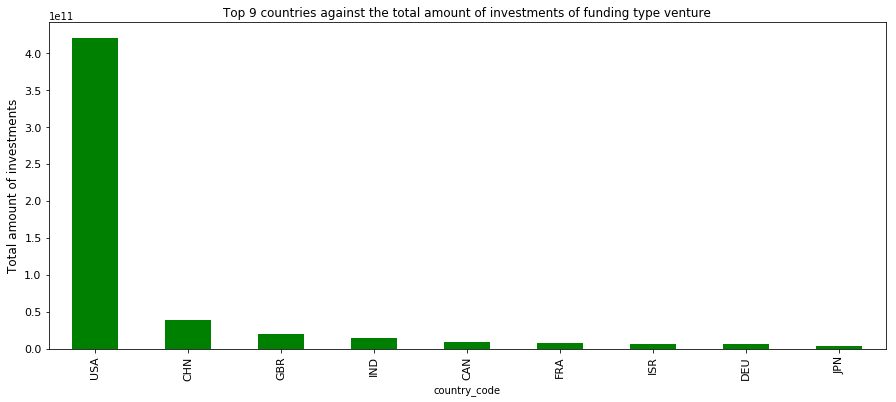

In [126]:
# plot showing the top 9 countries against the total amount of investments of funding type "venture". 
# This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear. 
ax = top9.plot(kind='bar', figsize=(15,6), color="green", fontsize=11);
ax.set_alpha(0.8)
ax.set_title("Top 9 countries against the total amount of investments of funding type venture", fontsize=12)
ax.set_ylabel("Total amount of investments", fontsize=12);
plt.show()

In [127]:
# Grouping D1 by top 3 number of investments in main_sector and sorting values
plot_D1 = D1.groupby('main_sector').raised_amount_usd.agg('count').sort_values(ascending = False).reset_index().head(3)

In [128]:
plot_D1

,main_sector,raised_amount_usd
0,Others,2950
1,"Social, Finance, Analytics, Advertising",2714
2,Cleantech / Semiconductors,2350


In [129]:
# Grouping D2 by top 3 number of investments in main_sector and sorting values
plot_D2 = D2.groupby('main_sector').raised_amount_usd.agg('count').sort_values(ascending = False).reset_index().head(3)

In [130]:
plot_D2

,main_sector,raised_amount_usd
0,Others,147
1,"Social, Finance, Analytics, Advertising",133
2,Cleantech / Semiconductors,130


***Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart for venture. 
This plot clearly displays the top 3 sectors each in Country 1, Country 2, and Country 3.***

In [131]:
# Grouping D3 by top 3 number of investments in main_sector and sorting values
plot_D3 = D3.groupby('main_sector').raised_amount_usd.agg('count').sort_values(ascending = False).reset_index().head(3)

In [132]:
# Verifying grouping
plot_D3

,main_sector,raised_amount_usd
0,Others,110
1,"Social, Finance, Analytics, Advertising",60
2,"News, Search and Messaging",52


In [133]:
# Merging D1 and D2
D1_D2 = pd.merge(plot_D1, plot_D2, how='outer', on='main_sector')

In [134]:
D1_D2

,main_sector,raised_amount_usd_x,raised_amount_usd_y
0,Others,2950,147
1,"Social, Finance, Analytics, Advertising",2714,133
2,Cleantech / Semiconductors,2350,130


In [135]:
# Merging with D3
D1_D2_D3 = pd.merge(D1_D2, plot_D3, how='outer', on='main_sector')

In [136]:
D1_D2_D3

,main_sector,raised_amount_usd_x,raised_amount_usd_y,raised_amount_usd
0,Others,2950.0,147.0,110.0
1,"Social, Finance, Analytics, Advertising",2714.0,133.0,60.0
2,Cleantech / Semiconductors,2350.0,130.0,NaN
3,"News, Search and Messaging",NaN,NaN,52.0


In [137]:
# renaming columns to country_code of D1, D2 and D3
D1_D2_D3 = D1_D2_D3.rename(columns= {'raised_amount_usd_x' : 'USA', 'raised_amount_usd_y' : 'GBR', 'raised_amount_usd' : 'IND'})

In [138]:
# Filling NaN with 0 
D1_D2_D3 = D1_D2_D3.fillna(0)

In [139]:
# Verifying changes
D1_D2_D3

,main_sector,USA,GBR,IND
0,Others,2950.0,147.0,110.0
1,"Social, Finance, Analytics, Advertising",2714.0,133.0,60.0
2,Cleantech / Semiconductors,2350.0,130.0,0.0
3,"News, Search and Messaging",0.0,0.0,52.0


In [140]:
# set main_sector as index
D1_D2_D3 = D1_D2_D3.set_index('main_sector')


In [141]:
# verifying index change
D1_D2_D3

,USA,GBR,IND
main_sector,,,
Others,2950.0,147.0,110.0
"Social, Finance, Analytics, Advertising",2714.0,133.0,60.0
Cleantech / Semiconductors,2350.0,130.0,0.0
"News, Search and Messaging",0.0,0.0,52.0


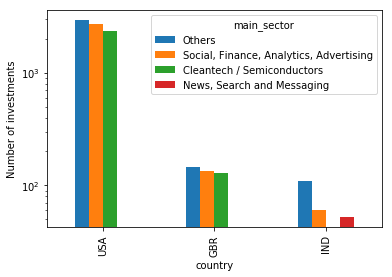

In [142]:
#Plotting to check number of investments in top 3 countries for top 3 sectors of each country
D1_D2_D3.T.plot.bar(logy=True)
plt.xlabel("country")
plt.ylabel("Number of investments")
plt.show()